ref: [Introduction to the Modeling and Analysis of Complex Systems](https://open.umn.edu/opentextbooks/textbooks/233)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
n = 100
p_tree = 0.6
p_fire = 0.01
trees = np.where(np.random.rand(n, n) < p_tree, 1, 0)
fire = np.where(np.random.rand(n, n) < p_fire, 2, 1)

forest_fire = trees * fire

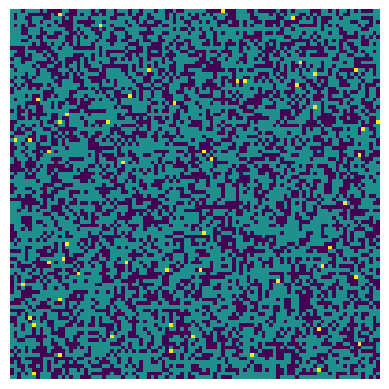

In [3]:
plt.imshow(forest_fire, vmin = 0, vmax = 2)
plt.axis(False);

In [4]:
complete_filter = np.where(forest_fire == 2, 0, 1)

In [5]:
next_forest_fire = np.ones([n, n])

In [6]:
for x, y in list(product(range(n), range(n))):
    count = 0
    for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
        if forest_fire[(x + dx) % n, (y + dy) % n] == 2 and forest_fire[x, y] == 1:
            next_forest_fire[x, y] = 2
            break

next_forest_fire = next_forest_fire * complete_filter * forest_fire

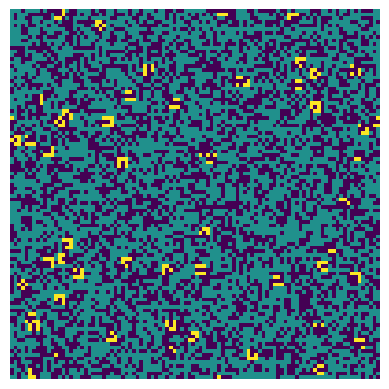

In [7]:
plt.imshow(next_forest_fire, vmin = 0, vmax = 2)
plt.axis(False);

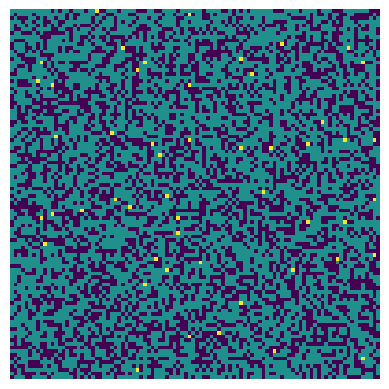

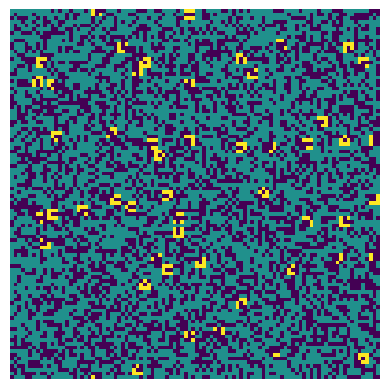

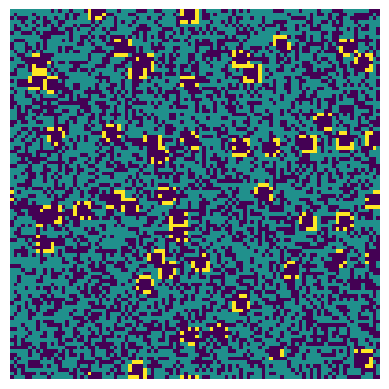

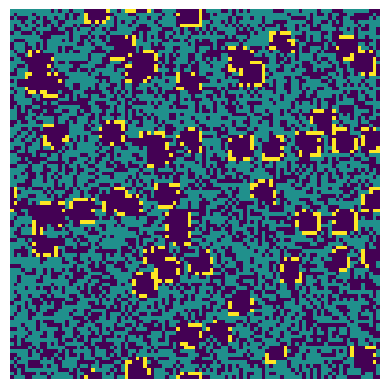

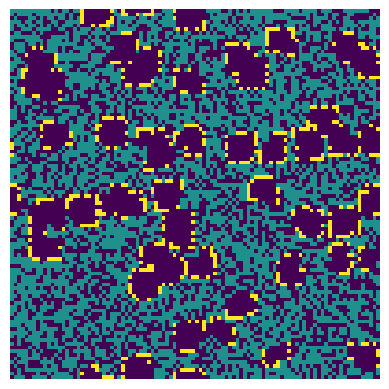

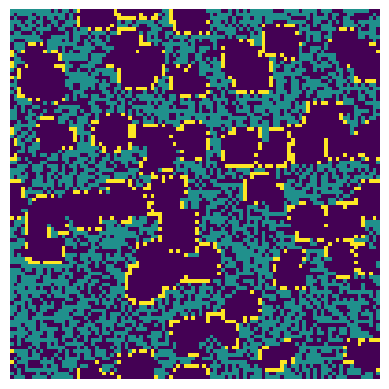

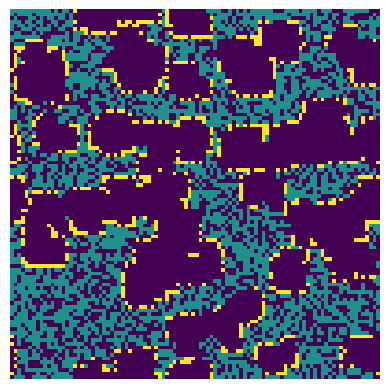

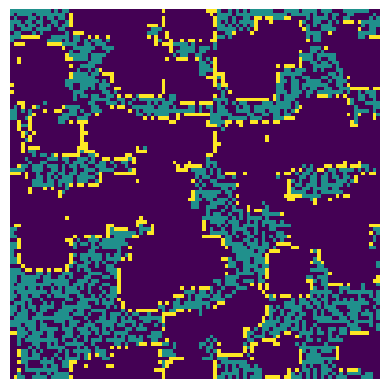

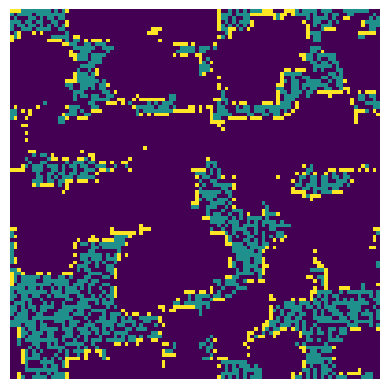

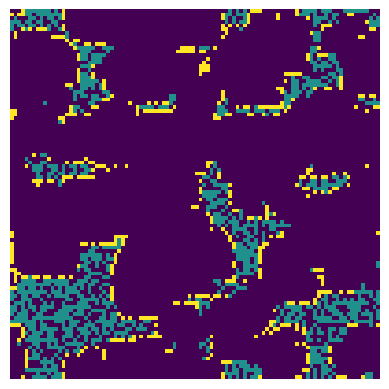

In [8]:
n = 100
p_tree = 0.6
p_fire = 0.01
trees = np.where(np.random.rand(n, n) < p_tree, 1, 0)
fire = np.where(np.random.rand(n, n) < p_fire, 2, 1)

forest_fire = trees * fire
next_forest_fire = np.ones([n, n])

for t in range(10):
    plt.imshow(forest_fire, vmin = 0, vmax = 2)
    plt.axis(False)
    plt.show()
    
    complete_filter = np.where(forest_fire == 2, 0, 1)
    next_forest_fire = np.ones([n, n])
    
    for x, y in list(product(range(n), range(n))):
        for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
            if forest_fire[(x + dx) % n, (y + dy) % n] == 2 and forest_fire[x, y] == 1:
                next_forest_fire[x, y] = 2
                break

    forest_fire = next_forest_fire * complete_filter * forest_fire

In [69]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [79]:
np.random.seed(42)

n = 200
p_tree = 0.4
p_fire = 0.003
trees = np.where(np.random.rand(n, n) < p_tree, 1, 0)
fire = np.where(np.random.rand(n, n) < p_fire, 2, 1)

forest_fire = trees * fire

fig = plt.figure(figsize=(8, 8))
im = plt.imshow(forest_fire, vmin = 0, vmax = 2)
plt.axis(False)
plt.close()


def drawframe(*args):
# for t in range(10):
#     plt.imshow(forest_fire, vmin = 0, vmax = 2)
#     plt.axis(False)
#     plt.show()
    global forest_fire
    im.set_array(forest_fire)
    
    complete_filter = np.where(forest_fire == 2, 0, 1)
    next_forest_fire = np.ones([n, n])
    
    for x, y in list(product(range(n), range(n))):
        for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
            if forest_fire[(x + dx) % n, (y + dy) % n] == 2 and forest_fire[x, y] == 1:
                next_forest_fire[x, y] = 2
                break

    forest_fire = next_forest_fire * complete_filter * forest_fire
    
    return im, 

In [80]:
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=200, blit=True)

In [81]:
anim

## How large a rule space of a given CA setting

- $D$ : Dimension of space (in my exmaple, 2)
- $L$ : Length of space in each (in my example, 200)
- $r$ : Radius of neigborhood (in my exmaple, 1)
- $k$ : Number of states for each cell (in my exmaple, 3)

### Length of each side of a neighborhood $= 2r + 1$
$$2\times 1 + 1 = 3$$
### Volume of the neighborhood $n = (2r + 1)^D$ 
$$n = (2\times 1 + 1) ^ 2 = 3^2 = 9$$
### The total number of local situations possible
$$m = k^n \to m = 3^9 = 19683$$

Note: Each of the $n$ cells in a neighborhood can take one of $k$ states

### The number of possible mappings
$$R = k^m \to 19683^3 \approx 7.625\times 10^{12} $$
$R$ is a function has to map each of the $m$ situations to one of the $k$ states.

### The total number of cells in the space
$$V = L^D \to V = 200^2 = 40000$$

### The total number of possible configurations
$$S = k^V \to S = 3^{40000}$$
Each cell in this volume takes one of the k states

#  one-dimensional binary CA model

In [13]:
import networkx as nx

In [33]:
g = nx.DiGraph()

r = 2
L = 9

def config(x):
    return [1 if x & 2**i > 0 else 0 for i in range(L - 1, -1, -1)] # bitwise

def cf_number(cf):
    return sum(cf[L - 1 - i] * 2**i for i in range(L))

def update(cf):
    nextcf = [0] * L
    for  x in range(L):
        count = 0
        for dx in range(-r, r+1):
            count += cf[(x + dx) % L]
        nextcf[x] = 1 if count > (2 * r + 1) * 0.5 else 0
        
    return nextcf

In [34]:
list(range(L - 1, -1, -1))

[8, 7, 6, 5, 4, 3, 2, 1, 0]

In [35]:
config(0)

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
config(511)

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [37]:
cf_number(config(501))

501

In [39]:
cf_number(update(config(501)))

511

The size of its phase space is just $2 ^ 9 = 512$

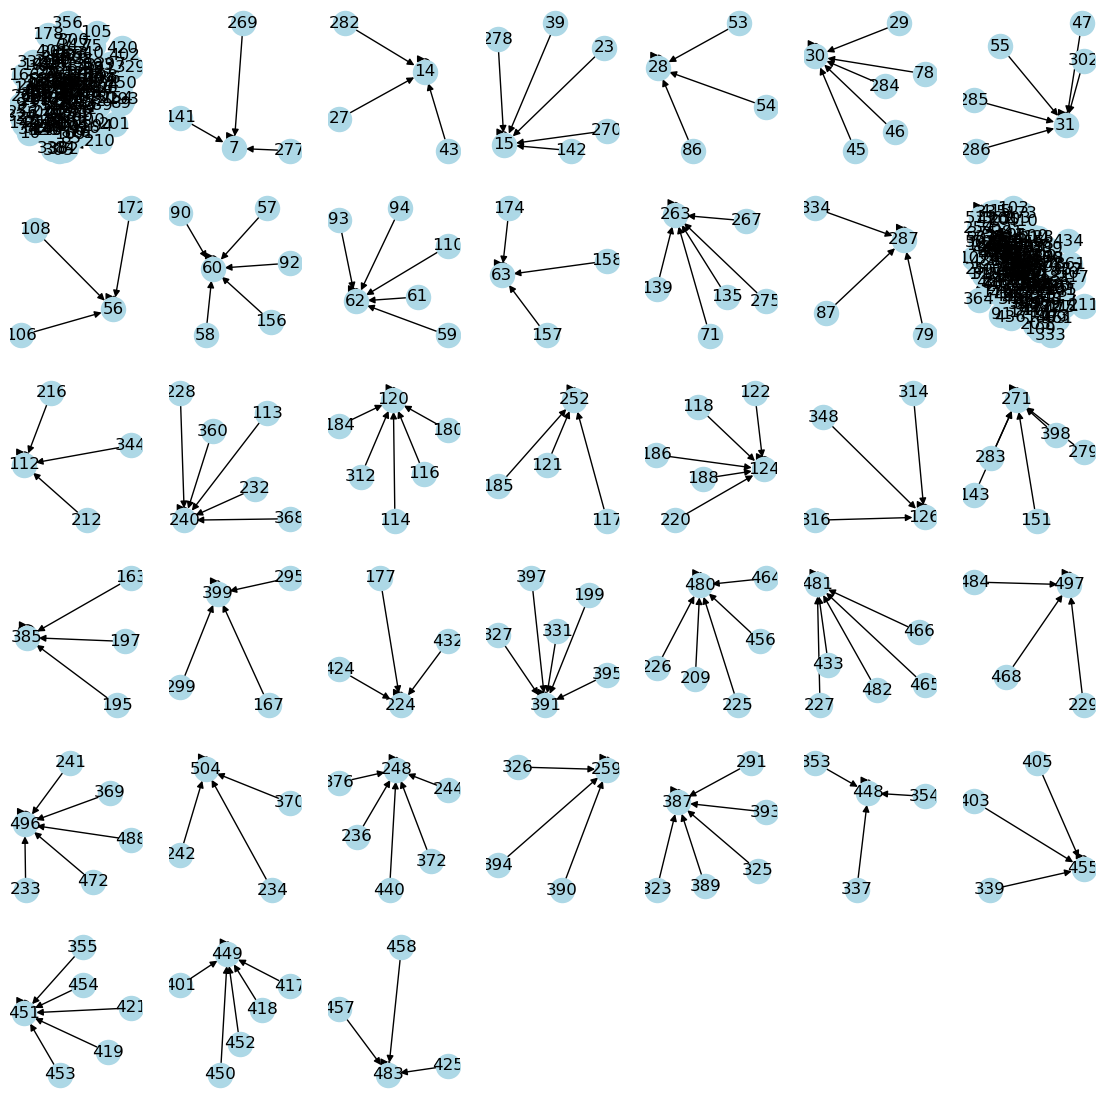

In [51]:
for x in range(2 ** L):
    g.add_edge(x, cf_number(update(config(x))))
    
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
w = int(np.ceil(np.sqrt(n)))
h = int(np.ceil(n / w))

plt.figure(figsize=(14, 14))
for i in range(n):
    plt.subplot(h, w, i + 1)
    nx.draw(nx.subgraph(g, ccs[i]), node_color='lightblue', with_labels=True)
plt.show()

## Renormalization Group Analysis to Predict Percolation Thresholds

![](portion1.png)
![](portion2.png)

This is the exhaustive list of possible situations where the fire will be conducted through a scale-2
block. We can calculate the probability for each situation and add them up, to obtain the
following relationship between $p_1$ and $p_2$:

$$p_2 = \Phi(p_1) = p_1^4 + 4p_1^3(1-p_1)+4p_1^2(1-p_1)^2$$

note: poisson distribution

So;
$$p_s = \Phi(p_{s-1}) = p_{s-1}^4 + 4p_{s-1}^3(1-p_{s-1})+4p_{s-1}^2(1-p_{s-1})^2$$

 Find the equilibrium point <!--around $p = 0.4$ -->
$$
\begin{align*}
p_c &= \Phi(p_c) = p_c^4 + 4p_c^3(1-p_c)+4p_c^2(1-p_c)^2\\
0 &= p_c(p_c^3 + 4p_c^2(1-p_c)+4p_c(1-p_c)^2 - 1)\\
0 &= p_c(1-p_c)(-p_c^2 - p_c - 1 + 4p_c^2 + 4p_c(1-p_c))\\
0 &= p_c(1-p_c)(-1 + 3p_c - p_c^2)\\
p_c = 0, 1, \frac{3\pm\sqrt{5}}{2}
\end{align*}
$$

$p_c = (3 - \sqrt{5}) / 2\approx 0.382$

So, the bottom line is, if the tree density in the forest is below 38%, the burned area will
remain small, but if it is above 38%, almost the entire forest will be burned down.

In [52]:
def f(x):
    return x**4 + 4*x**3*(1-x) + 4*x**2*(1-x)**2

In [66]:
def cobweb(f, x0, N, a=0, b=1):
        # plot the function being iterated
        t = np.linspace(a, b, N)
        plt.plot(t, f(t), 'k')

        # plot the dotted line y = x
        plt.plot(t, t, "k:")
    
        # plot the iterates
        x, y = x0, f(x0)
        for _ in range(N):
            fy = f(y)        
            plt.plot([x, y], [y,  y], 'b', linewidth=1)
            plt.plot([y, y], [y, fy], 'b', linewidth=1)
            x, y = y, fy
            
        # plt.axes().set_aspect(1) 
        plt.show()
        plt.close()

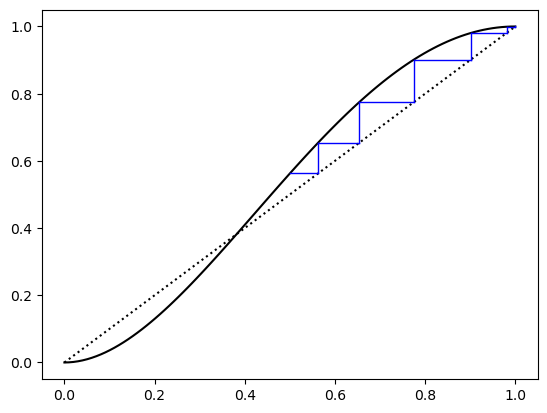

In [67]:
cobweb(f, 0.5, 100)

In [85]:
np.random.seed(42)

n = 200
p_tree = 0.35
p_fire = 0.003
trees = np.where(np.random.rand(n, n) < p_tree, 1, 0)
fire = np.where(np.random.rand(n, n) < p_fire, 2, 1)

forest_fire = trees * fire

fig = plt.figure(figsize=(8, 8))
im = plt.imshow(forest_fire, vmin = 0, vmax = 2)
plt.axis(False)
plt.close()


def drawframe(*args):
# for t in range(10):
#     plt.imshow(forest_fire, vmin = 0, vmax = 2)
#     plt.axis(False)
#     plt.show()
    global forest_fire
    im.set_array(forest_fire)
    
    complete_filter = np.where(forest_fire == 2, 0, 1)
    next_forest_fire = np.ones([n, n])
    
    for x, y in list(product(range(n), range(n))):
        for dx, dy in list(product([-1, 0, 1], [-1, 0, 1])):
            if forest_fire[(x + dx) % n, (y + dy) % n] == 2 and forest_fire[x, y] == 1:
                next_forest_fire[x, y] = 2
                break

    forest_fire = next_forest_fire * complete_filter * forest_fire
    
    return im, 

In [86]:
anim = animation.FuncAnimation(fig, drawframe, frames=150, interval=200, blit=True)

In [87]:
anim